In [2]:
def display_df_unique_elements(in_df, in_df_name):
  # Display unique elements for each of the specified columns
  subject_unique = in_df['Subject'].unique()
  avg_type_unique = in_df['Avg_Type'].unique()
  vowel_unique = in_df['Vowel'].unique()
  condition_unique = in_df['Condition'].unique()

  print(f"DF name: {in_df_name}")
  print(f"DF length: {len(in_df)}")
  print(f"Unique subjects: {subject_unique}")
  print(f"Unique average types: {avg_type_unique}")
  print(f"Unique vowels: {vowel_unique}")
  print(f"Unique conditions: {condition_unique}")
  print('--------------------------')

In [3]:
from PIL import Image
from scipy.ndimage import zoom

def rescale_spectrogram(spectrogram, new_size=(64, 64)):
    # Calculate the zoom factor for each dimension
    zoom_factor = [n / o for n, o in zip(new_size, spectrogram.shape)]
    # Use scipy's zoom function to resize the spectrogram
    spectrogram_rescaled = zoom(spectrogram, zoom_factor)
    return spectrogram_rescaled

In [4]:
import pandas as pd

# Load the pickle file
# Replace 'path_to_your_file.pkl' with the actual path to your pickle file
df = pd.read_pickle('study2DataFrame.pkl')

# Get the number of rows and columns
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

# List the column names
print(f"Column names: {df.columns[1024:].tolist()}")

display_df_unique_elements(df, 'original')

The DataFrame has 2560 rows and 1028 columns.
Column names: ['Subject', 'Avg_Type', 'Vowel', 'Condition']
DF name: original
DF length: 2560
Unique subjects: ['S1' 'S2' 'S3' 'S4' 'S6' 'S7' 'S9' 'S12' 'S13' 'S14' 'S15' 'S16' 'S17'
 'S18' 'S19' 'S20' 'S21' 'S22' 'S23' 'S25']
Unique average types: ['EFR' 'FFR']
Unique vowels: ['a vowel' 'e vowel' 'n vowel' 'u vowel']
Unique conditions: ['test' 'retest']
--------------------------


In [5]:
# Get the number of rows
num_rows = df.shape[0]

# Display the first few rows to get an overview
print(df.iloc[:, 1024:].head())  # Assuming the non-raw data starts from column 1024

# Summary for the non-raw data columns
print(df[['Subject', 'Avg_Type', 'Vowel', 'Condition']].describe(include='all'))

# Get the number of rows and columns
print(f"The DataFrame has {num_rows} rows.")

  Subject Avg_Type    Vowel Condition
0      S1      EFR  a vowel      test
1      S1      EFR  a vowel      test
2      S1      EFR  a vowel    retest
3      S1      EFR  a vowel    retest
4      S1      EFR  a vowel      test
       Subject Avg_Type    Vowel Condition
count     2560     2560     2560      2560
unique      20        2        4         2
top         S1      EFR  a vowel      test
freq       128     1280      640      1280
The DataFrame has 2560 rows.


In [6]:
# Remove rows where 'Avg_Type' is 'EFR'
# df_filtered = df[df['Avg_Type'] != 'EFR']
df_filtered = df[df['Avg_Type'] != 'FFR']

# Split the DataFrame based on the 'Condition' column
df_test = df_filtered[df_filtered['Condition'] == 'test']
df_retest = df_filtered[df_filtered['Condition'] == 'retest']

In [7]:
display_df_unique_elements(df_test, 'test')
display_df_unique_elements(df_retest, 'retest')

DF name: test
DF length: 640
Unique subjects: ['S1' 'S2' 'S3' 'S4' 'S6' 'S7' 'S9' 'S12' 'S13' 'S14' 'S15' 'S16' 'S17'
 'S18' 'S19' 'S20' 'S21' 'S22' 'S23' 'S25']
Unique average types: ['EFR']
Unique vowels: ['a vowel' 'e vowel' 'n vowel' 'u vowel']
Unique conditions: ['test']
--------------------------
DF name: retest
DF length: 640
Unique subjects: ['S1' 'S2' 'S3' 'S4' 'S6' 'S7' 'S9' 'S12' 'S13' 'S14' 'S15' 'S16' 'S17'
 'S18' 'S19' 'S20' 'S21' 'S22' 'S23' 'S25']
Unique average types: ['EFR']
Unique vowels: ['a vowel' 'e vowel' 'n vowel' 'u vowel']
Unique conditions: ['retest']
--------------------------


In [8]:
from pprint import pprint

# Initialize a dictionary to hold the counts for each subject and vowel
subject_vowel_counts = {subject: {'a vowel': 0, 'e vowel': 0, 'n vowel': 0, 'u vowel': 0}
                        for subject in df_test['Subject'].unique()}

# Loop over each subject and count the vowels
for subject in subject_vowel_counts.keys():
    subject_data = df_test[df_test['Subject'] == subject]  # Filter data for the subject
    for vowel in ['a vowel', 'e vowel', 'n vowel', 'u vowel']:
        subject_vowel_counts[subject][vowel] = subject_data[subject_data['Vowel'] == vowel].shape[0]

pprint(subject_vowel_counts)

{'S1': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S12': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S13': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S14': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S15': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S16': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S17': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S18': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S19': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S2': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S20': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S21': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S22': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S23': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S25': {'a vowel': 8, 'e vowel': 8, 'n vowel': 8, 'u vowel': 8},
 'S3': {'a v

In [9]:
import numpy as np

def concatenate_vowels_v2(df):
    dataset = {}  # Dictionary to hold the data for each subject

    # Iterate through each unique subject
    for subject in df['Subject'].unique():
        dataset[subject] = []  # List to hold the numpy arrays for this subject

        # Since we know there are 8 occurrences for each vowel, we loop 8 times
        for i in range(8):
            # Initialize a list to hold the concatenated arrays for this iteration
            concatenated_arrays = []

            # Iterate through each vowel and concatenate the ith occurrence
            for vowel in ['a vowel', 'e vowel', 'n vowel', 'u vowel']:
                # Filter the DataFrame for the current subject and vowel, and get the ith occurrence
                row_data = df[(df['Subject'] == subject) & (df['Vowel'] == vowel)].iloc[i, :1024]

                # Append the row data to the concatenated arrays list
                concatenated_arrays.append(row_data.values)

            if i == 6 or i == 7:
              # Concatenate along the first axis to get a single array for this subject and iteration
              dataset[subject].append(np.concatenate(concatenated_arrays).astype(np.float32))

        # dataset[subject] = np.mean(dataset[subject], axis=0).astype(np.float32)
        # dataset[subject] = dataset[subject][-2:]

    return dataset

In [10]:
print(len(concatenate_vowels_v2(df_test)))
print(len(concatenate_vowels_v2(df_test)['S1']))
print(concatenate_vowels_v2(df_test)['S1'][0].shape)

20
2
(4096,)


In [11]:
test_dataset_v2 = concatenate_vowels_v2(df_test)
retest_dataset_v2 = concatenate_vowels_v2(df_retest)

In [13]:
!rm -rf concat_test concat_retest

In [14]:
# s1_test = test_dataset_v2['S1'][1]
# s1_retest = retest_dataset_v2['S1'][1]

subject = 'S1'

s1_test = (test_dataset_v2[subject][0] + test_dataset_v2[subject][1]) / 2
s1_retest = (retest_dataset_v2[subject][0] + retest_dataset_v2[subject][1]) / 2

print('s1_test.shape', s1_test.shape)
print('s1_retest.shape', s1_retest.shape)

s1_test.shape (4096,)
s1_retest.shape (4096,)


s1_test.shape (4096,)
preprocessed_s1_test.shape (4096,)
preprocessed_s1_test_padded.shape (9606,)
s1_retest.shape (4096,)
preprocessed_s1_retest.shape (4096,)
preprocessed_s1_retest_padded.shape (9606,)


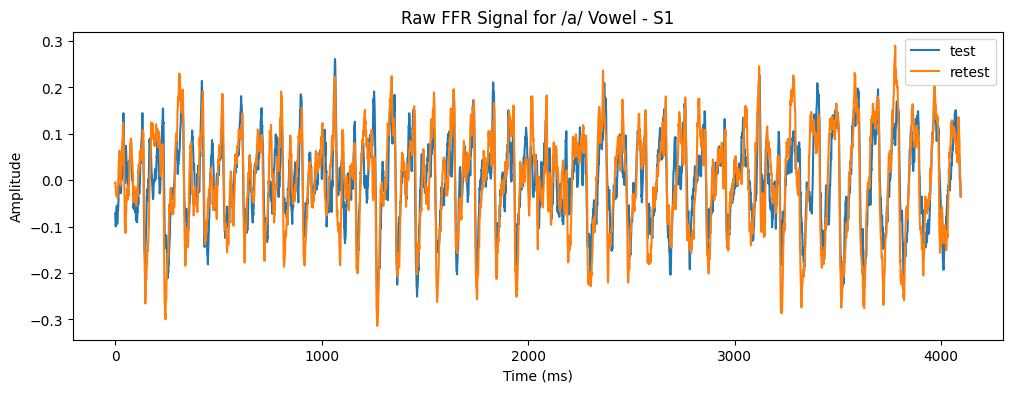

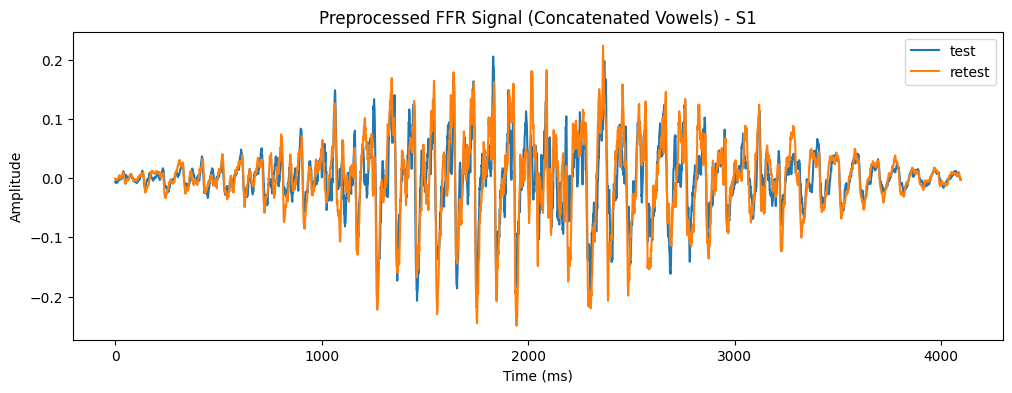

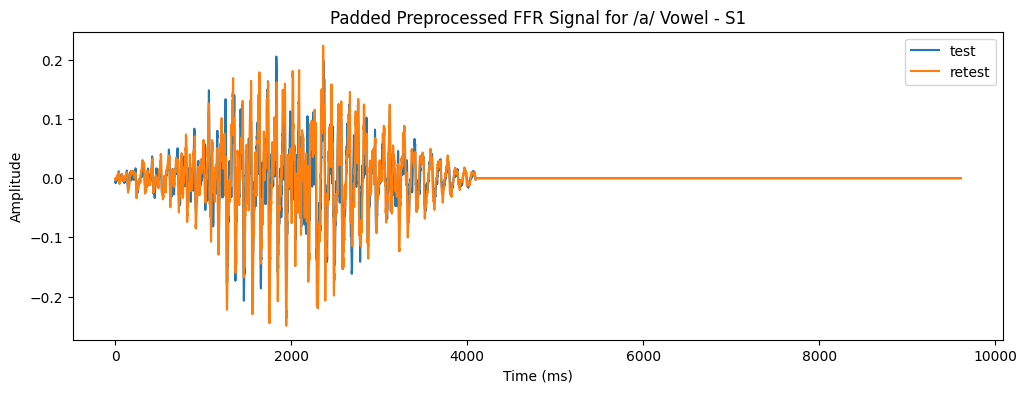

In [16]:
from scipy import signal
from matplotlib import pyplot as plt

# Function to preprocess a signal
def preprocess_signal(input_signal, sampling_rate=9606):
    # Detrend (data in PKL file was already detrended)
    signal_detrended = input_signal#signal.detrend(input_signal)

    # Remove DC offset
    signal_zero_mean = signal_detrended - np.mean(signal_detrended)

    # Apply Hamming window
    hamming_window = signal.windows.hamming(len(signal_zero_mean))
    signal_windowed = signal_zero_mean * hamming_window

    # # Normalize the signal to have a maximum value of 1
    # signal_normalized = signal_windowed / np.max(np.abs(signal_windowed))

    # Zero Padding
    original_length = len(input_signal)
    fft_length = int(sampling_rate / 1)

    # Calculate the padding length
    padding_length = fft_length - original_length
    if padding_length < 0:
        padding_length = 0  # No padding needed if fft_length is shorter than the signal

    signal_padded = np.pad(signal_windowed, (0, padding_length), 'constant')

    return signal_windowed, signal_padded

# s1_test = s1_test[:1024]
# s1_retest = s1_retest[:1024]

preprocessed_s1_test, preprocessed_s1_test_padded = preprocess_signal(s1_test, sampling_rate=9606)
preprocessed_s1_retest, preprocessed_s1_retest_padded = preprocess_signal(s1_retest, sampling_rate=9606)

print('s1_test.shape', s1_test.shape)
print('preprocessed_s1_test.shape', preprocessed_s1_test.shape)
print('preprocessed_s1_test_padded.shape', preprocessed_s1_test_padded.shape)

print('s1_retest.shape', s1_retest.shape)
print('preprocessed_s1_retest.shape', preprocessed_s1_retest.shape)
print('preprocessed_s1_retest_padded.shape', preprocessed_s1_retest_padded.shape)

# Plotting the FFR data
plt.figure(figsize=(12, 4))
plt.plot(s1_test, label='test')
plt.plot(s1_retest, label='retest')
# plt.title('Concatenated EFR')
plt.title(f'Raw FFR Signal for /a/ Vowel - {subject}')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plotting the FFR data
plt.figure(figsize=(12, 4))
plt.plot(preprocessed_s1_test, label='test')
plt.plot(preprocessed_s1_retest, label='retest')
# plt.title('Preprocessed EFR')
plt.title(f'Preprocessed FFR Signal (Concatenated Vowels) - {subject}')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plotting the FFR data
plt.figure(figsize=(12, 4))
plt.plot(preprocessed_s1_test_padded, label='test')
plt.plot(preprocessed_s1_retest_padded, label='retest')
# plt.title('Preprocessed EFR')
plt.title(f'Padded Preprocessed FFR Signal for /a/ Vowel - {subject}')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

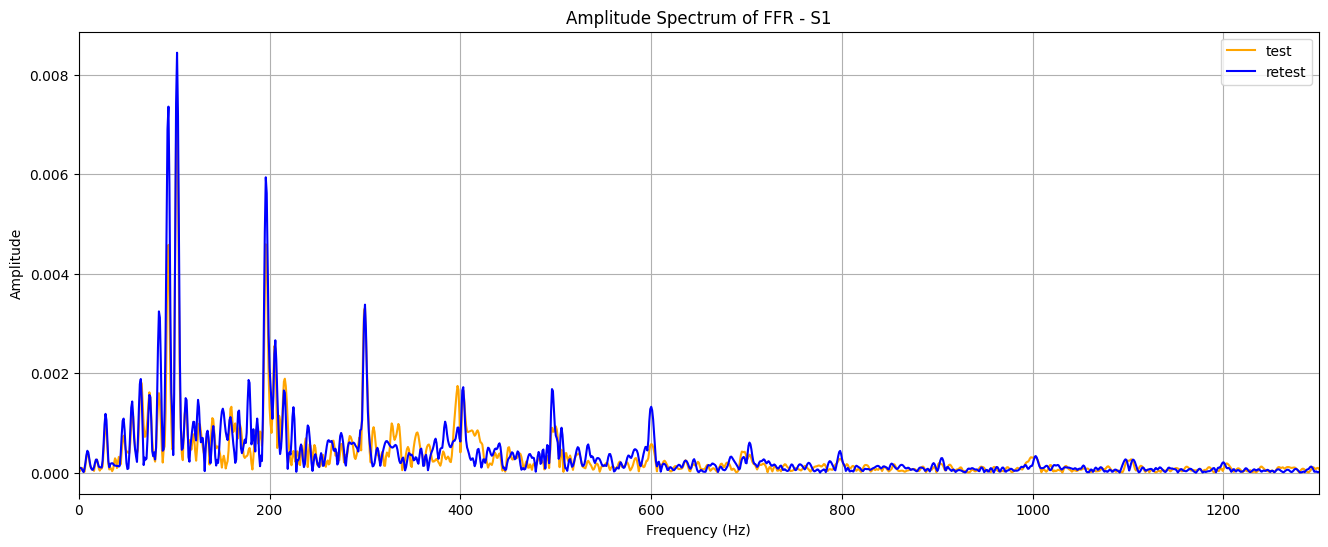

In [17]:
from scipy.fft import fft

# Define a function to calculate the amplitude spectrum
def calculate_amplitude_spectrum(s, sampling_rate):
    # Perform the Fourier Transform
    fft_result = fft(s)

    # Normalize the FFT result
    fft_normalized = fft_result / len(s)

    # Calculate the amplitude spectrum
    amplitude_spectrum = np.abs(fft_normalized)

    # Only take the first half of the spectrum (positive frequencies)
    half_spectrum = amplitude_spectrum[:len(amplitude_spectrum)//2]

    # Create a frequency vector
    freq_vector = np.linspace(0, sampling_rate/2, len(half_spectrum))

    return freq_vector, half_spectrum

# Calculate the amplitude spectrum
freq_vector_s1_test, amplitude_spectrum_s1_test = calculate_amplitude_spectrum(preprocessed_s1_test_padded, sampling_rate=9606)
freq_vector_s1_retest, amplitude_spectrum_s1_retest = calculate_amplitude_spectrum(preprocessed_s1_retest_padded, sampling_rate=9606)

# Plot the amplitude spectrum
plt.figure(figsize=(16, 6))
plt.plot(freq_vector_s1_test, amplitude_spectrum_s1_test, "orange", label='test')
plt.plot(freq_vector_s1_retest, amplitude_spectrum_s1_retest, "blue", label='retest')
# plt.title("Amplitude Spectrum of EFR")
plt.title(f"Amplitude Spectrum of FFR - {subject}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 1300)  # Limit the x-axis to 500 Hz to focus on the lower frequencies
plt.legend()

plt.grid(True)
plt.show()

preprocessed_s1_test.shape (4096,)
float64
Sxx_dB_limited.shape (70, 8)


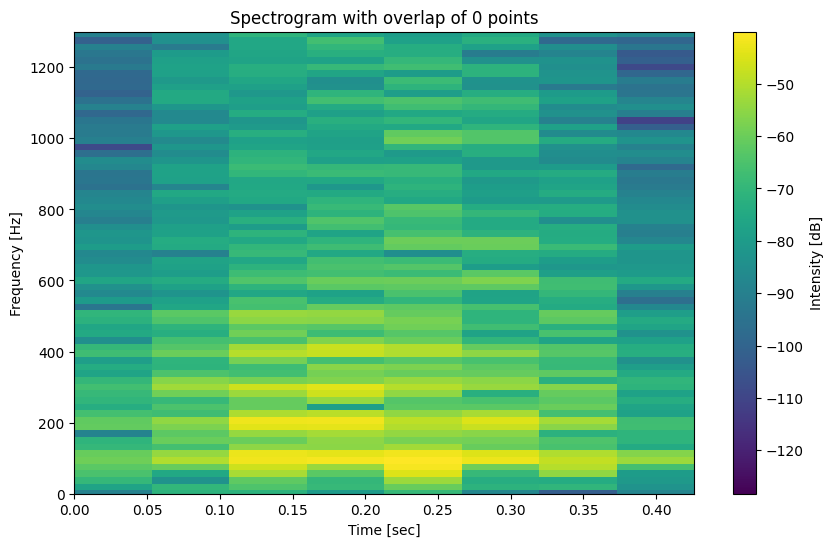

Sxx_dB_limited.shape (70, 15)


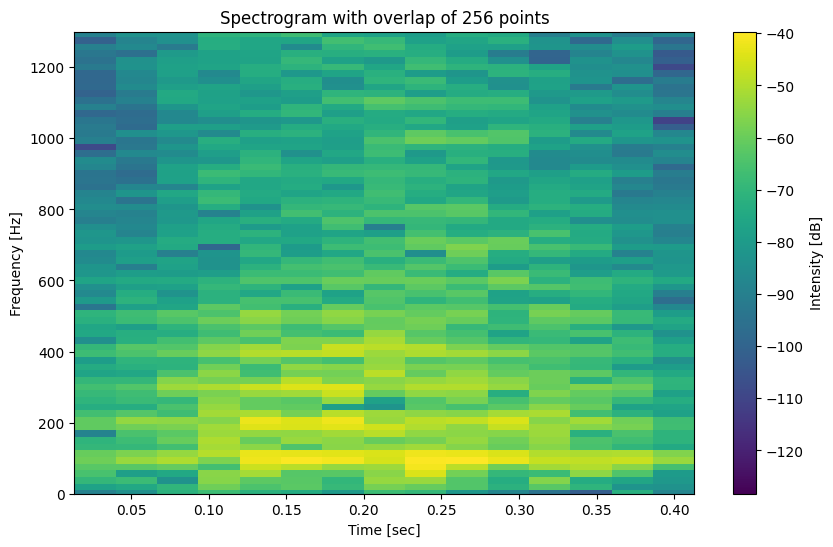

Sxx_dB_limited.shape (70, 3585)


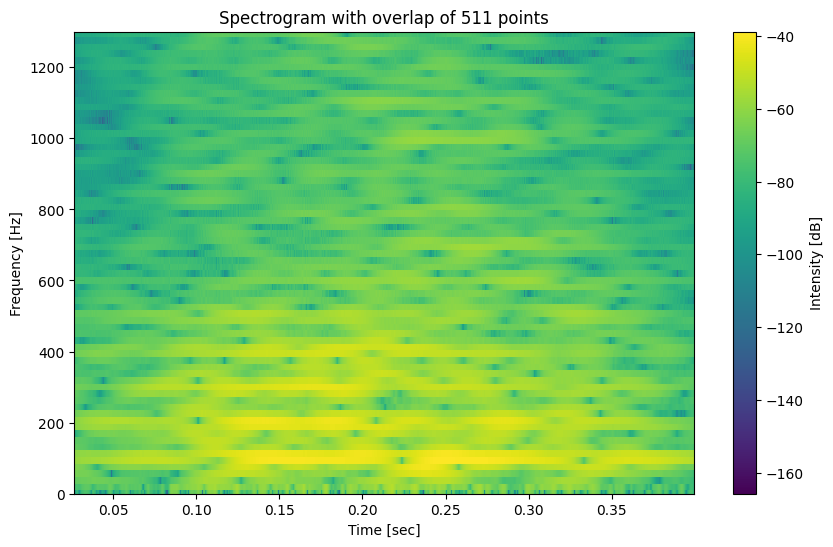

In [61]:
# Define the sampling frequency based on the duration of the signal and number of samples
fs = len(preprocessed_s1_test) / 0.4264  # Number of samples divided by the total duration in seconds (4096/9606)

# Define the window size and the overlap for the STFT
window_size = 512  # Window size as mentioned
overlaps = [0, 256, 511]  # Different overlaps as mentioned

print('preprocessed_s1_test.shape', preprocessed_s1_test.shape)
print(preprocessed_s1_test.dtype)

# Generate and plot the spectrogram for each overlap
for overlap in overlaps:
    # Calculate the STFT and the spectrogram
    frequencies, times, Sxx = signal.spectrogram(preprocessed_s1_test, fs=fs, window='hamming', nperseg=window_size, noverlap=overlap)

    # Convert the spectrogram to dB
    Sxx_dB = 10 * np.log10(Sxx)

    # Find the index of the frequency that is just above 1300 Hz
    idx = np.where(frequencies <= 1300)[0][-1]

    # Slice the Sxx_dB array to include only the frequencies up to 1300 Hz
    Sxx_dB_limited = Sxx_dB[:idx+1, :]

    # Normalize the Sxx_dB_limited values to be between 0 and 1
    Sxx_normalized = (Sxx_dB_limited - np.min(Sxx_dB_limited)) / (np.max(Sxx_dB_limited) - np.min(Sxx_dB_limited))

    # # Create an image from the array
    # plt.imsave(f'spectrogram_overlap_{overlap}_1300Hz.png', Sxx_normalized, cmap='viridis', format='png')

    print('Sxx_dB_limited.shape', Sxx_dB_limited.shape)

    # # Optionally, save the limited frequency spectrogram data as a NumPy array (.npy file)
    # np.save(f'spectrogram_overlap_{overlap}_1300Hz.npy', Sxx_dB_limited)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='nearest')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram with overlap of {overlap} points')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 1300)  # Limit the frequency range to Nyquist frequency

    # # Save the figure as an image (.png file)
    # plt.savefig(f'spectrogram_overlap_{overlap}.png')

    plt.show()

preprocessed_s1_test.shape (4096,)
Sxx_dB_limited.shape (35, 16)


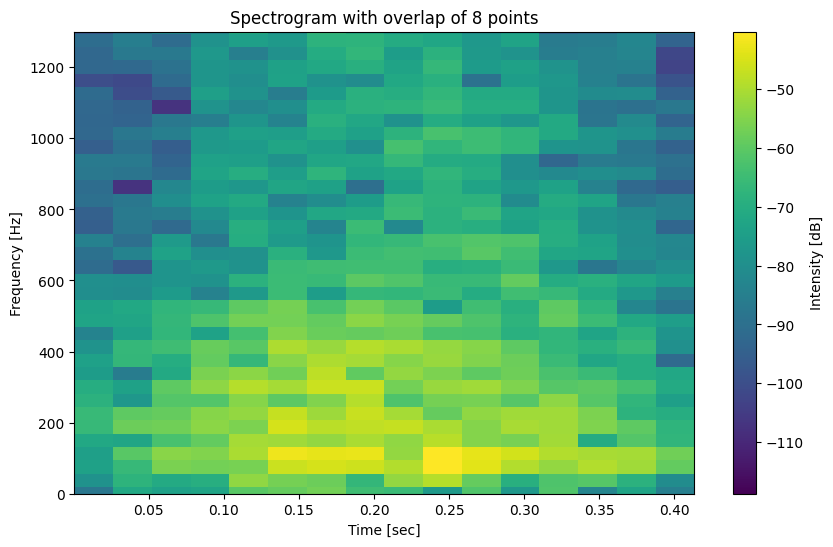

Sxx_dB_limited.shape (35, 21)


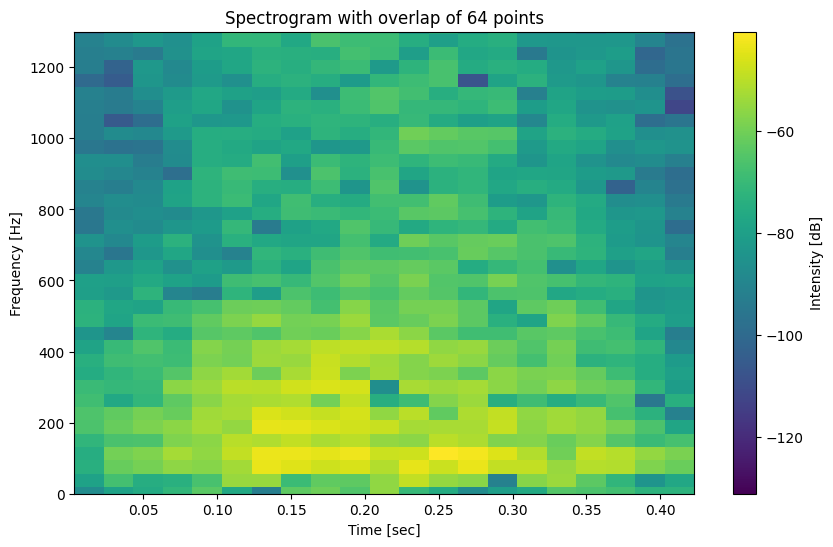

Sxx_dB_limited.shape (35, 31)


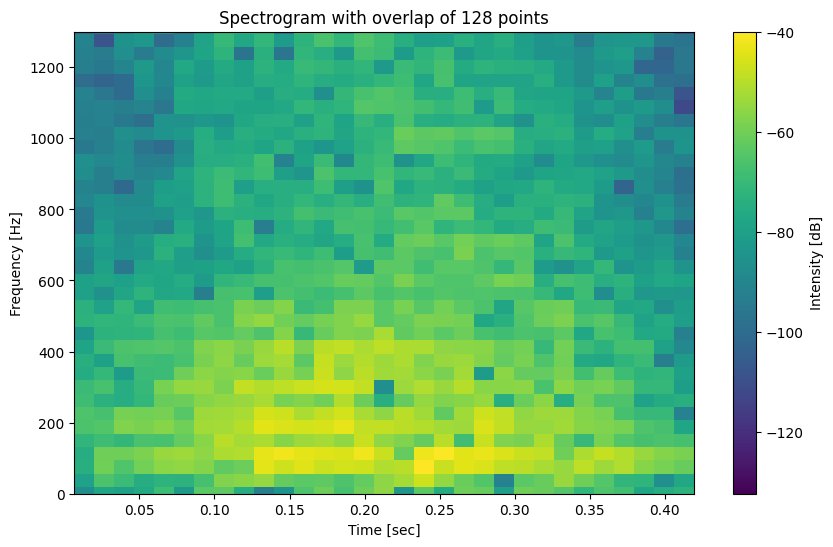

Sxx_dB_limited.shape (35, 641)


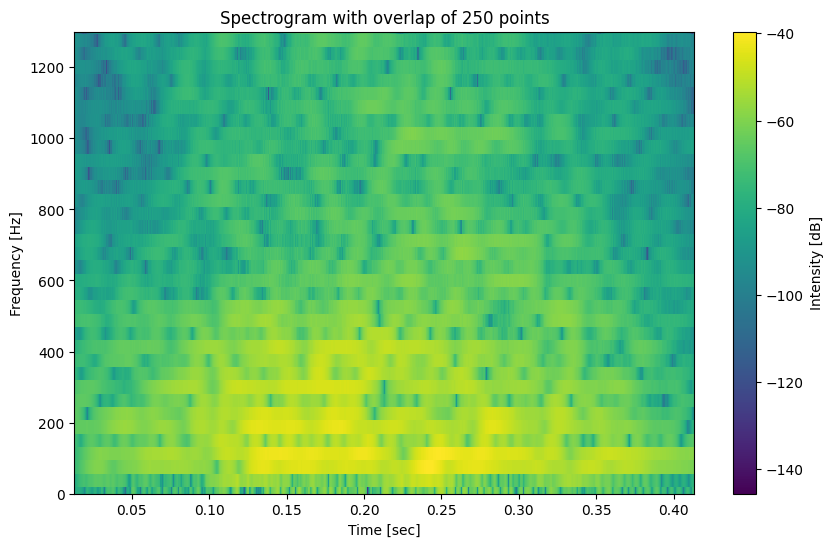

In [63]:
# Define the sampling frequency based on the duration of the signal and number of samples
fs = len(preprocessed_s1_test) / 0.4264  # Number of samples divided by the total duration in seconds

# Define the window size and the overlap for the STFT
window_size = 256  # Window size as mentioned
overlaps = [8, 64, 128, 250]  # Different overlaps as mentioned

print('preprocessed_s1_test.shape', preprocessed_s1_test.shape)

# Generate and plot the spectrogram for each overlap
for overlap in overlaps:
    # Calculate the STFT and the spectrogram
    frequencies, times, Sxx = signal.spectrogram(preprocessed_s1_test, fs=fs, window='hamming', nperseg=window_size, noverlap=overlap)

    # Convert the spectrogram to dB
    Sxx_dB = 10 * np.log10(Sxx)

    # Find the index of the frequency that is just above 1300 Hz
    idx = np.where(frequencies <= 1300)[0][-1]

    # Slice the Sxx_dB array to include only the frequencies up to 1300 Hz
    Sxx_dB_limited = Sxx_dB[:idx+1, :]

    # Normalize the Sxx_dB_limited values to be between 0 and 1
    Sxx_normalized = (Sxx_dB_limited - np.min(Sxx_dB_limited)) / (np.max(Sxx_dB_limited) - np.min(Sxx_dB_limited))

    # # # Create an image from the array
    # plt.imsave(f'spectrogram_overlap_{overlap}_1300Hz.png', Sxx_normalized, cmap='viridis', format='png')
    
    # # # Create an image from the array
    # plt.imsave(f'spectrogram_overlap_{overlap}_1300Hz.png', rescale_spectrogram(Sxx_normalized), cmap='gray', format='png')
    
    # # Convert to an image
    # spectrogram_image = Image.fromarray(np.uint8(Sxx_normalized * 255), 'L')

    # # Resize the image to 256x256
    # spectrogram_resized = spectrogram_image.resize((64, 64), Image.LANCZOS)

    # # Save the resized image
    # spectrogram_resized.save(f'spectrogram_overlap_{overlap}_1300Hz.png')

    print('Sxx_dB_limited.shape', Sxx_dB_limited.shape)

    # # Optionally, save the limited frequency spectrogram data as a NumPy array (.npy file)
    # np.save(f'spectrogram_overlap_{overlap}_1300Hz.npy', Sxx_dB_limited)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='nearest')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram with overlap of {overlap} points')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 1300)  # Limit the frequency range to Nyquist frequency

    # # Save the figure as an image (.png file)
    # plt.savefig(f'spectrogram_overlap_{overlap}.png')

    plt.show()

In [17]:
def compute_spectogram(input_signal, window_size, overlap):
  fs = len(input_signal) / 0.4264

  # Calculate the STFT and the spectrogram
  frequencies, times, Sxx = signal.spectrogram(input_signal, fs=fs, window='hamming', nperseg=window_size, noverlap=overlap)

  # Convert the spectrogram to dB
  Sxx_dB = 10 * np.log10(Sxx)

  # Find the index of the frequency that is just above 1300 Hz
  idx = np.where(frequencies <= 1300)[0][-1]

  # Slice the Sxx_dB array to include only the frequencies up to 1300 Hz
  Sxx_dB_limited = Sxx_dB[:idx+1, :]

  # Normalize the Sxx_dB_limited values to be between 0 and 1
  Sxx_normalized = (Sxx_dB_limited - np.min(Sxx_dB_limited)) / (np.max(Sxx_dB_limited) - np.min(Sxx_dB_limited))

  # print('Sxx_dB_limited.shape', Sxx_dB_limited.shape)

  return Sxx_normalized

In [18]:
# import os
# import numpy as np

# def save_subject_arrays(efr_data, dataset_name):
#     # Create a directory for the dataset if it doesn't exist
#     if not os.path.exists(dataset_name):
#         os.makedirs(dataset_name)

#     spectogram_map = {
#         256: [8, 64, 128, 250],
#         512: [0, 256, 511],
#     }

#     for subject_id, signals in efr_data.items():
#         for i, input_signal in enumerate(signals):
#           # Define the filename with the dataset name, subject, and iteration
#           aenu_filename = f"{dataset_name}/{subject_id}_aenu_{i}.npy"
#           # print(aenu_filename)
#           np.save(aenu_filename, input_signal)

#           preprocessed_filename = f"{dataset_name}/{subject_id}_preprocessed_{i}.npy"
#           # print(aenu_filename)
#           np.save(preprocessed_filename, preprocess_signal(input_signal, sampling_rate=9606))

#           ampspectra_filename = f"{dataset_name}/{subject_id}_ampspectra_{i}.npy"
#           # print(ampspectra_filename)
#           np.save(ampspectra_filename, calculate_amplitude_spectrum(input_signal, sampling_rate=9606))

#           for window_size, overlaps in spectogram_map.items():
#             for overlap in overlaps:
#               spectogram = compute_spectogram(input_signal, window_size, overlap)
#               spectogram_filename = f"{dataset_name}/{subject_id}_spectogram_{i}_{window_size}_{overlap}.npy"
#               # print(spectogram_filename)
#               np.save(spectogram_filename, spectogram)
#               # plt.imsave(f"{dataset_name}/{subject_id}_spectogram_{i}_{window_size}_{overlap}.png", spectogram, cmap='gray', format='png')
#               plt.imsave(f"{dataset_name}/{subject_id}_spectogram_{i}_{window_size}_{overlap}.png", rescale_spectrogram(spectogram), cmap='gray', format='png')


# # You would call the function like this:
# save_subject_arrays(test_dataset_v2, 'test')
# save_subject_arrays(retest_dataset_v2, 'retest')

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import signal

# # Generate a test signal (as before)
# fs = len(preprocessed_s1_test) / 0.4264  # Sampling frequency in Hz
# # t = np.linspace(0, 2, 2 * fs, endpoint=False)  # Time vector
# in_signal = preprocessed_s1_test # np.sin(2 * np.pi * t * t)  # Quadratic phase increases frequency over time

# # Compute the spectrogram (as before)
# frequencies, times, Sxx = signal.spectrogram(in_signal, fs, window='hamming', nperseg=512, noverlap=256)
# Sxx_dB = 10 * np.log10(Sxx)

# # # Find the index of the frequency that is just above 1300 Hz
# # idx = np.where(frequencies <= 1300)[0][-1]

# # # Crop the Sxx array to include only the frequencies up to 1300 Hz
# # Sxx_cropped = Sxx[:idx+1, :]

# # # Also, crop the frequencies array to reflect this change
# # frequencies_cropped = frequencies[:idx+1]

# # print(Sxx_cropped.shape)

# # Sxx_dB = compute_spectogram(preprocessed_s1_test, 256, 8)

# # print(Sxx_dB.shape)

# # Plot the spectrogram with a discrete appearance
# fig, ax = plt.subplots(figsize=(10, 10))
# plt.pcolormesh(times, frequencies, Sxx_dB, shading='nearest')  # Using 'nearest' for a discrete look
# plt.ylim(0, 1300)
# plt.axis('off')

# # Remove padding and margins around the plot
# plt.margins(0, 0)
# ax.set_frame_on(False)

# # Adjust the layout
# plt.tight_layout(pad=0)

# # Show the plot
# plt.show()

# # To save the figure without white space
# fig.savefig('spectrogram.png', bbox_inches='tight', pad_inches=0)


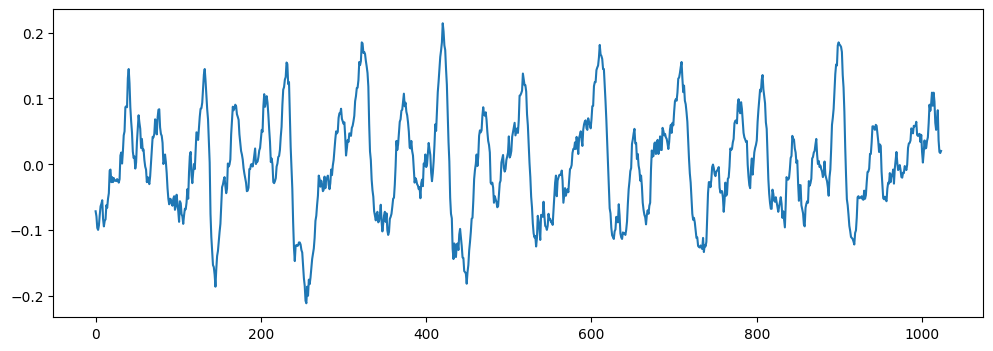

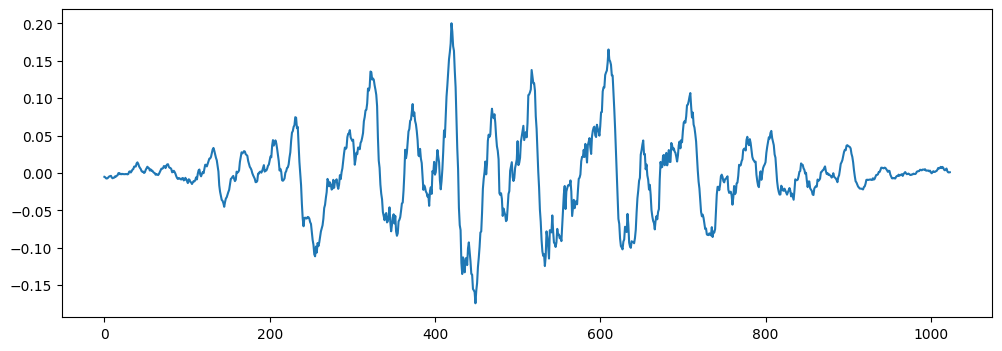

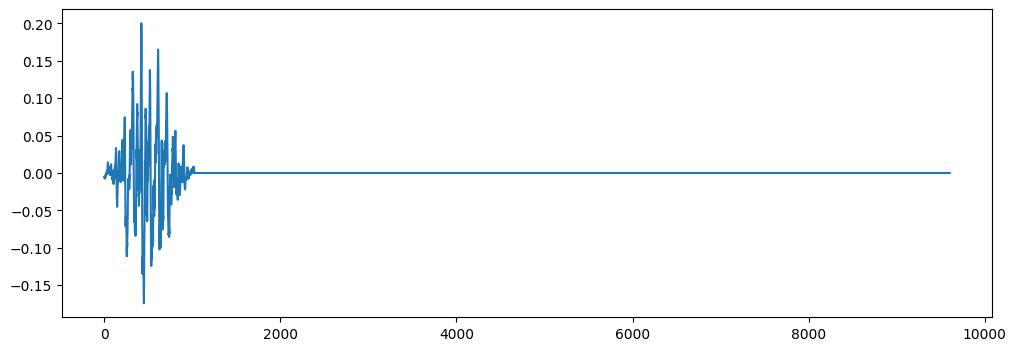

In [27]:
input_signal = s1_test[:1024]

plt.figure(figsize=(12, 4))
plt.plot(input_signal)
plt.show()

# Detrend (data in PKL file was already detrended)
signal_detrended = signal.detrend(input_signal)

# Remove DC offset
signal_zero_mean = signal_detrended - np.mean(signal_detrended)

# Apply Hamming window
hamming_window = signal.windows.hamming(len(signal_zero_mean))
signal_windowed = signal_zero_mean * hamming_window

plt.figure(figsize=(12, 4))
plt.plot(signal_windowed)
plt.show()

# # Normalize the signal to have a maximum value of 1
# signal_normalized = signal_windowed / np.max(np.abs(signal_windowed))

# Zero Padding
original_length = len(input_signal)
fft_length = int(9606 / 1)

# Calculate the padding length
padding_length = fft_length - original_length
if padding_length < 0:
    padding_length = 0  # No padding needed if fft_length is shorter than the signal

signal_padded = np.pad(signal_windowed, (0, padding_length), 'constant')

plt.figure(figsize=(12, 4))
plt.plot(signal_padded)
plt.show()